In [2]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib # collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os

In [3]:
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


1.   age: age in years
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: refers to the presence of heart disease in the patient (1=yes, 0=no)



In [5]:
df.target.value_counts()

,count
target,
1,526
0,499


In [7]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

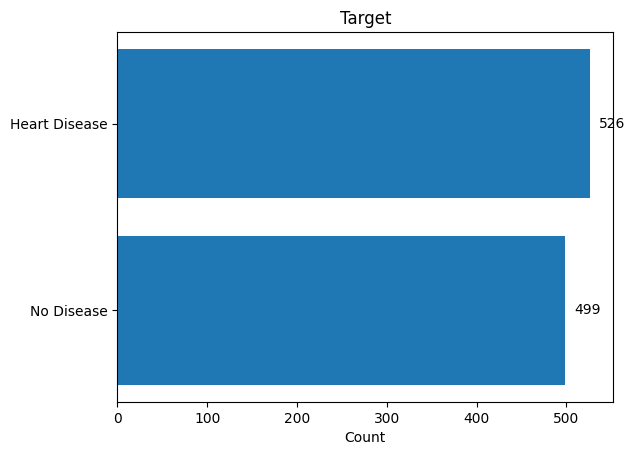

In [9]:
# Visualising the disease and non-disease
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

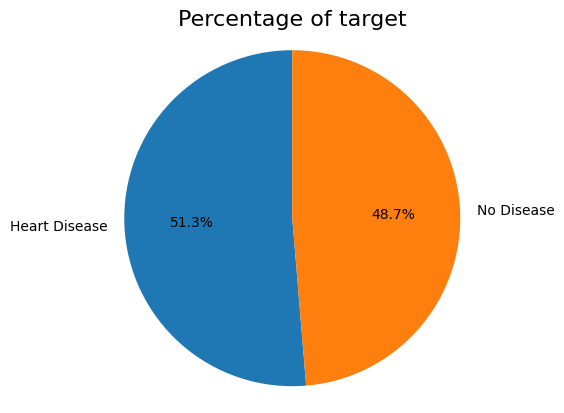

In [10]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [11]:
df.isna().sum() # missing values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
# Finding qualitative and quantitative features
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [13]:
qualitative

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
quantitative

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

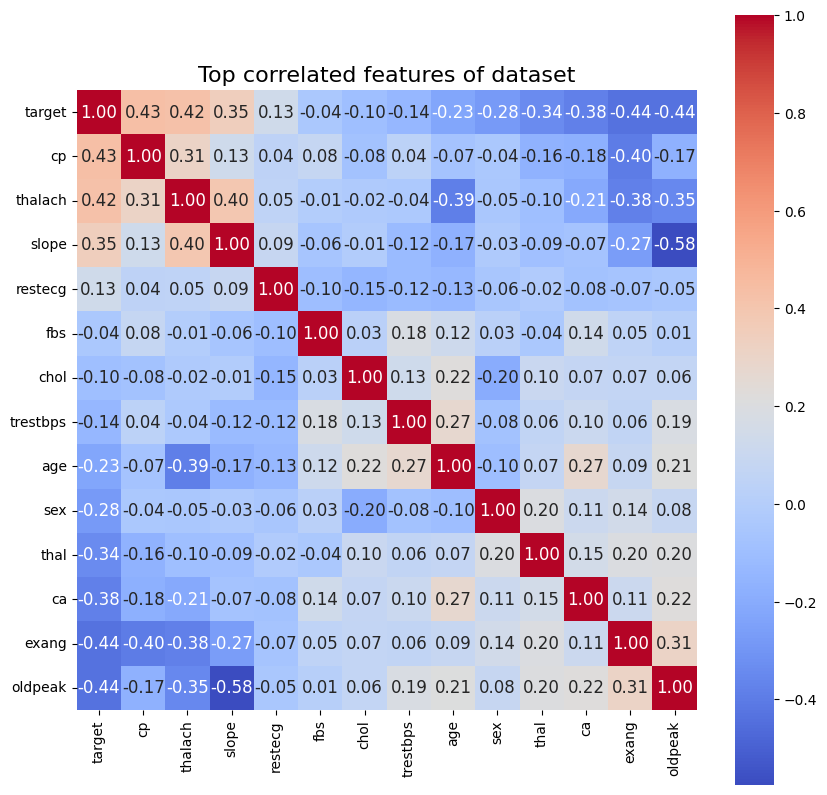

In [15]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'target')['target'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()
# Highest correlation value between cp,talach and target

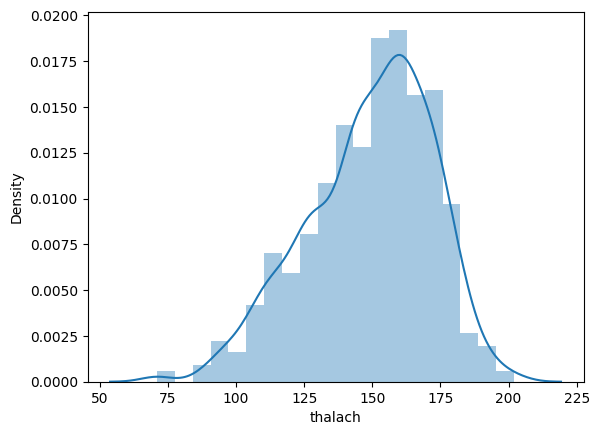

In [17]:
ax = sns.distplot(df['thalach'])

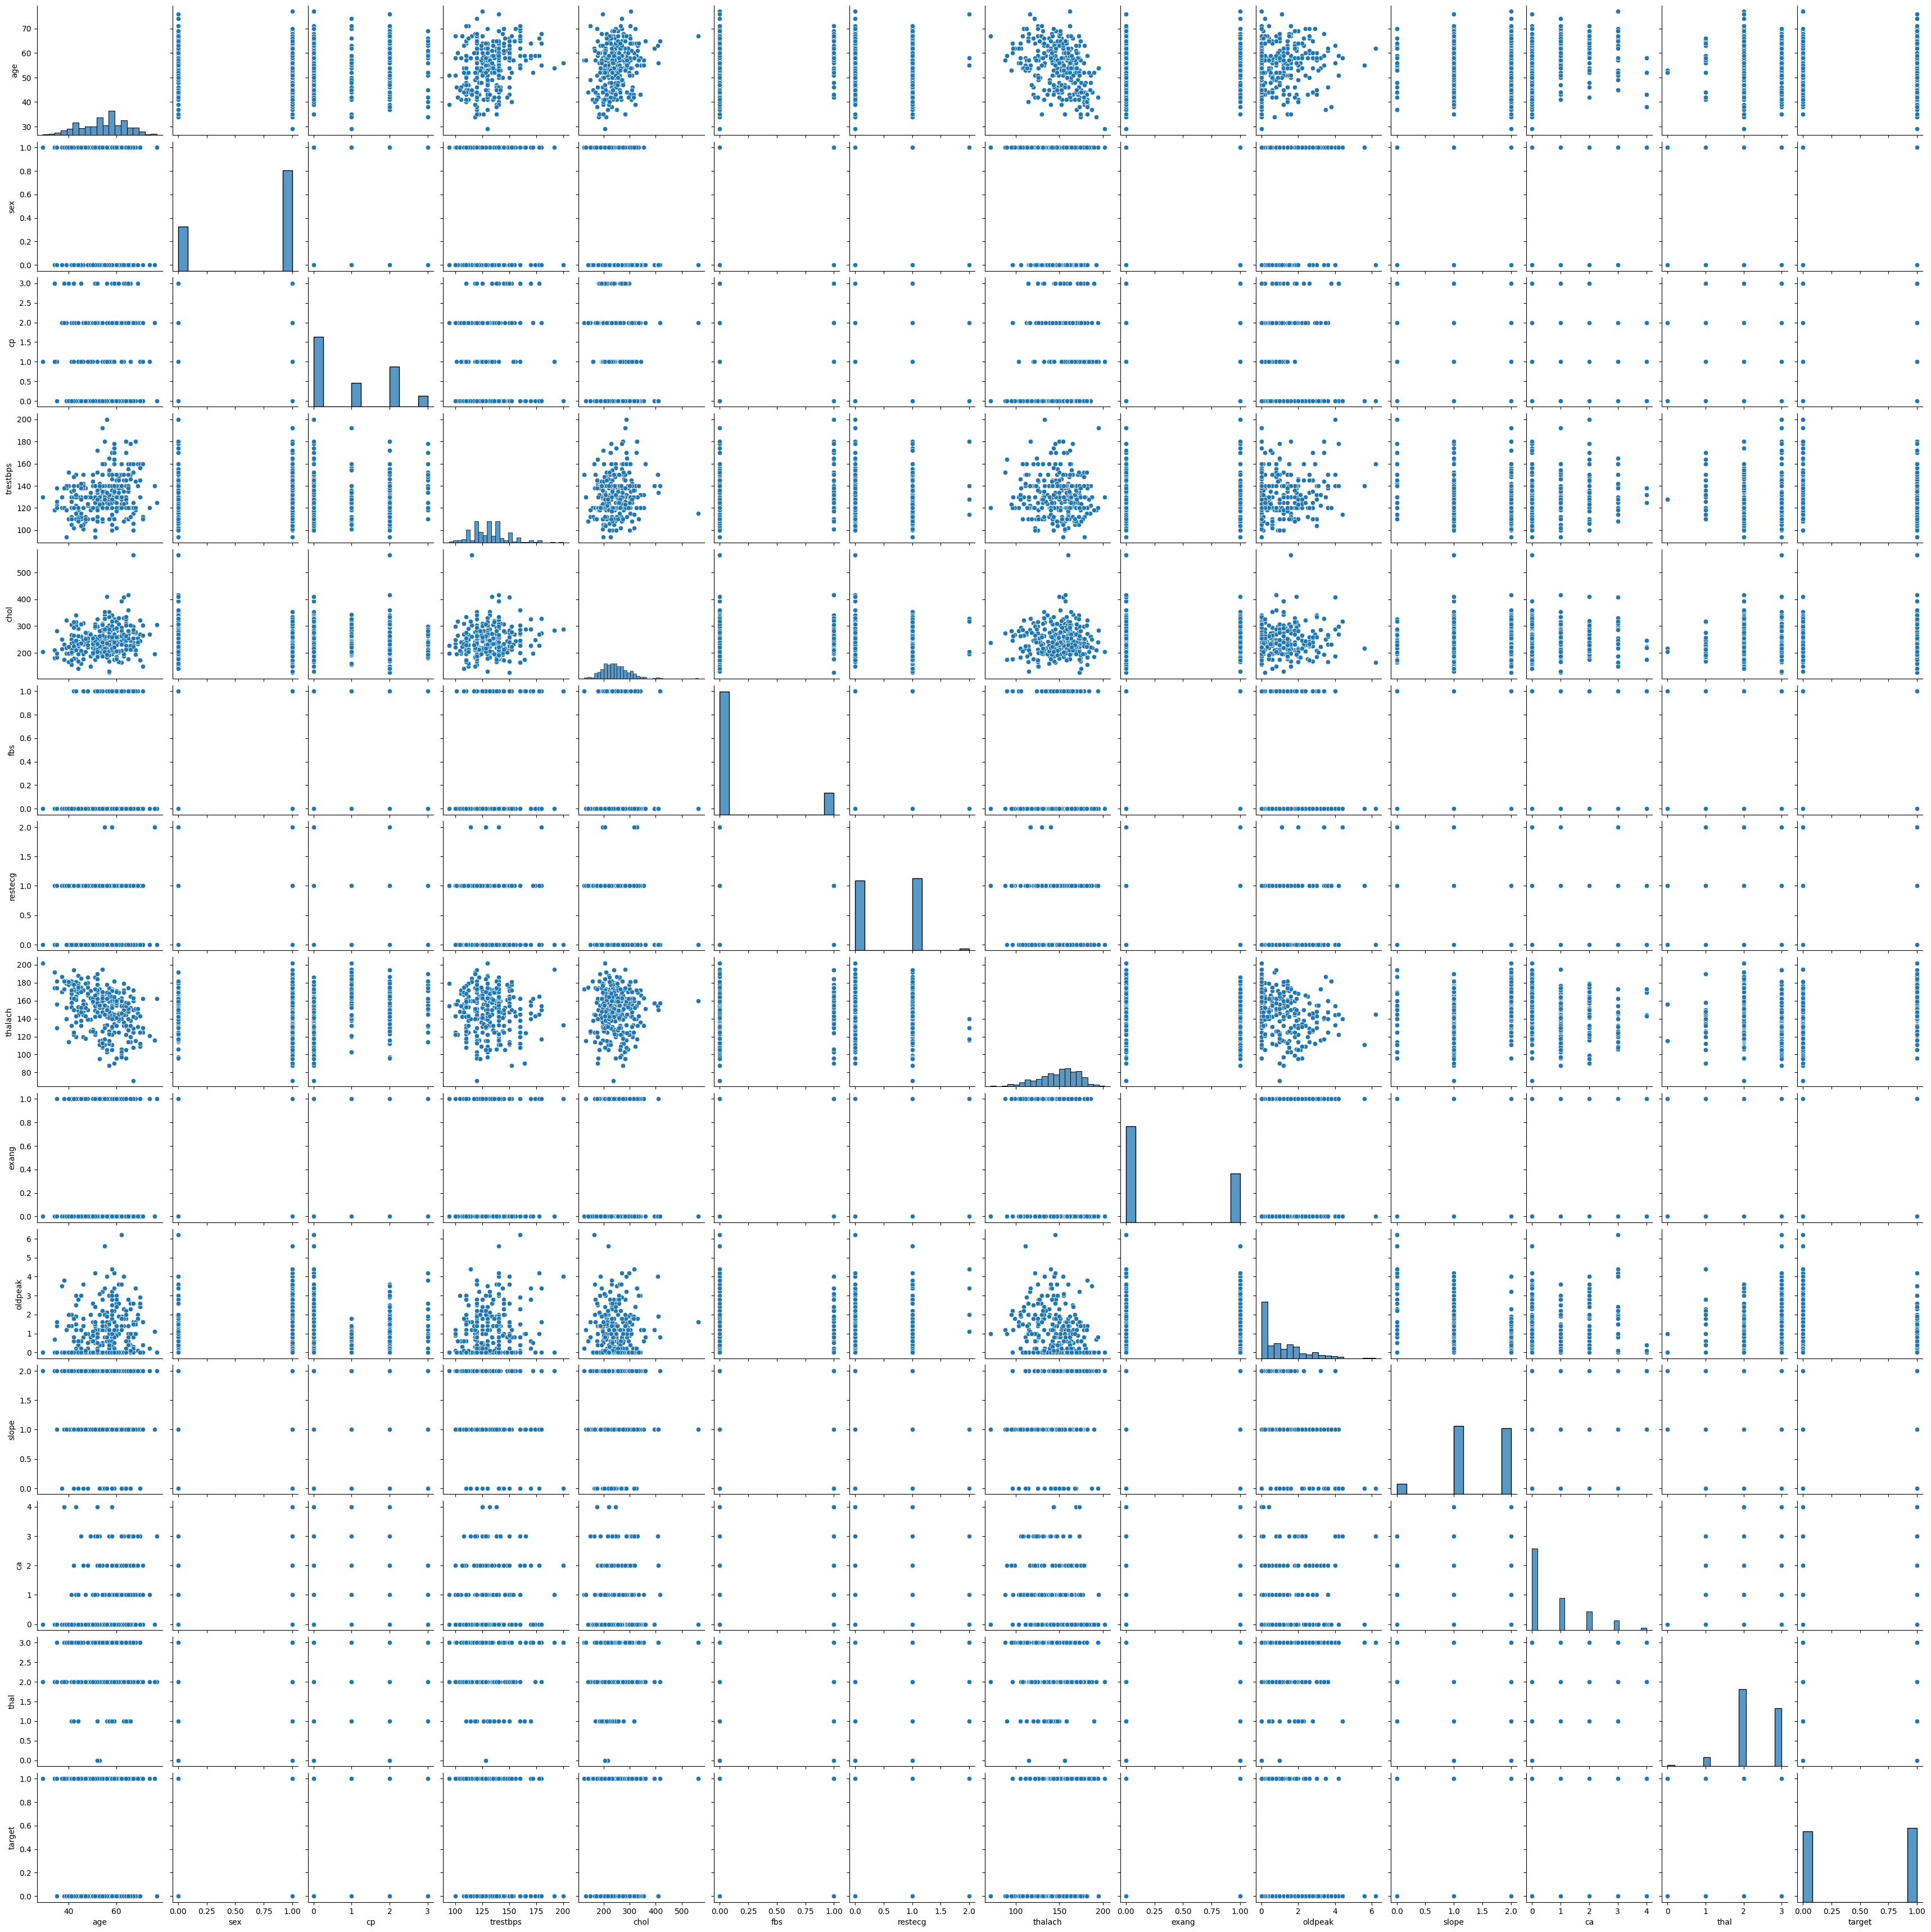

In [20]:
sns.pairplot(df)

In [29]:
X = df.drop('target',axis=1)
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (1025, 13) (1025,)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (820, 13) (820,)
shape of X and y respectively (test) : (205, 13) (205,)


In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Training Score: 1.0
Testing Score: 1.0
   Predicted
0          1
1          0
2          0
3          1
4          0
% of people predicted with heart-disease: 0.5219512195121951
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



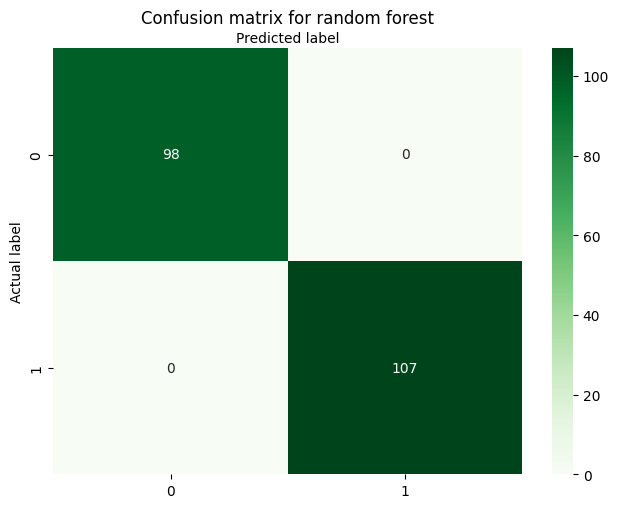

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

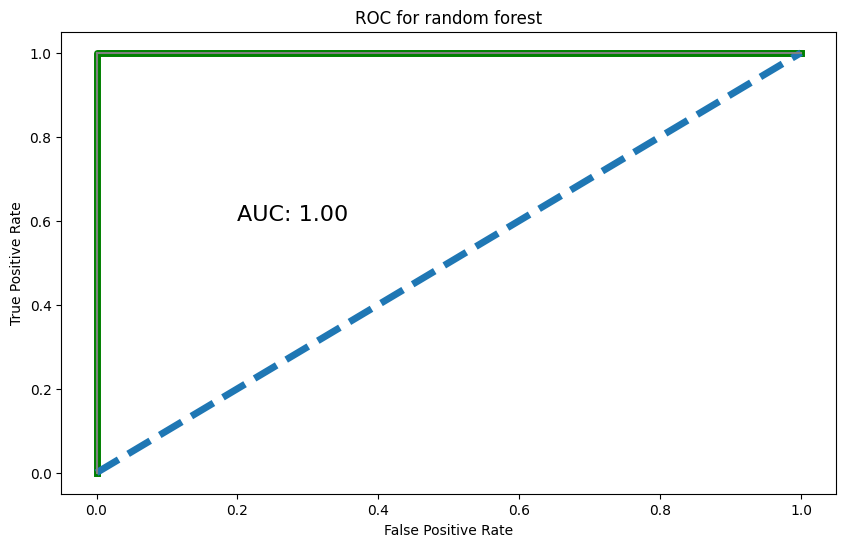

In [36]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [39]:
output.to_csv('output.csv', index=False)
print("Success!")

Success!


In [40]:
output.head(3)

,Predicted
0,1
1,0
2,0
